# Economic Data Revisions


_What we learn from history is that people don't learn from history_ - Warren Buffett 

- St Louis Fed FRED: popular series, api
- ALFRED: archival, releases, vintages, revisions
- FRED-MD: release dates


In [20]:
import time
import random
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
from finds.readers import Alfred, fred_md, fred_qd
from finds.utils import plot_date, plot_groupbar
from datetime import datetime
from secret import credentials, paths
VERBOSE = 0
# %matplotlib qt

## Retrieving web data 

We can use access data from the web by
1. Retrieving a structured file in csv, excel, json or any other format
2. Scraping a web page and searching for information after particular html tags
3. Calling provided API's -- these are a set of protocols that you can communicate with particular web server 


### Retrieve a formatted file                                                             


In [21]:
from finds.readers import alfred

# file' URL                                                                                  
url = 'https://files.stlouisfed.org/files/htdocs/fred-md/monthly/current.csv'

In [22]:
# Pandas has several built=in readers for csv, xml, json, excel and even html files          
df = pd.read_csv(url, header=0)
df

,sasdate,RPI,W875RX1,DPCERA3M086SBEA,CMRMTSPLx,RETAILx,INDPRO,IPFPNSS,IPFINAL,IPCONGD,...,DNDGRG3M086SBEA,DSERRG3M086SBEA,CES0600000008,CES2000000008,CES3000000008,UMCSENTx,DTCOLNVHFNM,DTCTHFNM,INVEST,VIXCLSx
0,Transform:,5.000,5.0,5.000,5.000000e+00,5.00000,5.0000,5.0000,5.0000,5.0000,...,6.000,6.000,6.00,6.00,6.00,2.0,6.00,6.00,6.0000,1.0000
1,1/1/1959,2583.560,2426.0,15.188,2.766768e+05,18235.77392,21.9665,23.3891,22.2688,31.7011,...,18.294,10.152,2.13,2.45,2.04,NaN,6476.00,12298.00,84.2043,NaN
2,2/1/1959,2593.596,2434.8,15.346,2.787140e+05,18369.56308,22.3966,23.7048,22.4617,31.9337,...,18.302,10.167,2.14,2.46,2.05,NaN,6476.00,12298.00,83.5280,NaN
3,3/1/1959,2610.396,2452.7,15.491,2.777753e+05,18523.05762,22.7193,23.8483,22.5719,31.9337,...,18.289,10.185,2.15,2.45,2.07,NaN,6508.00,12349.00,81.6405,NaN
4,4/1/1959,2627.446,2470.0,15.435,2.833627e+05,18534.46600,23.2032,24.1927,22.9026,32.4374,...,18.300,10.221,2.16,2.47,2.08,NaN,6620.00,12484.00,81.8099,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
778,10/1/2023,19150.227,15784.0,116.773,1.504786e+06,703528.00000,102.5502,100.7429,100.8604,101.4790,...,120.040,124.212,29.97,34.67,26.65,63.8,513250.88,916401.90,5023.0081,19.0462
779,11/1/2023,19225.440,15860.3,117.258,1.514120e+06,703336.00000,102.9955,101.3226,101.7518,102.3826,...,119.324,124.533,30.26,34.96,26.89,61.3,517477.03,918934.92,5008.1757,13.8563
780,12/1/2023,19265.016,15893.6,117.796,1.523993e+06,704107.00000,102.6920,100.8370,101.2506,101.7671,...,119.192,124.912,30.42,34.98,27.13,69.7,521938.91,921959.34,5085.0414,12.6960
781,1/1/2024,19382.046,15928.8,117.538,1.502408e+06,696710.00000,102.2251,100.4828,101.1400,102.0886,...,118.741,125.718,30.54,35.25,27.18,79.0,523550.71,923131.38,5112.8007,13.3453



### Scrape a web page                                                                      


In [23]:
from bs4 import BeautifulSoup
import requests

# web page's URL                                                                             
url = f"https://fred.stlouisfed.org/tags/series?ob=pv&pageID=1"

In [24]:
# use requests package to retrieve the web page content                                      
data = requests.get(url).content

In [25]:
# parse the HTML                                                                             
soup = BeautifulSoup(data, 'lxml')
print(soup.decode()[39000:40000])   # show a snippet                                         

<h3><a class="series-title pager-series-title-gtm" href="/series/T10Y2Y" id="titleLink" style="font-size:1.2em; padding-bottom: 2px">10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity</a></h3>
</div>
<div class="display-results-popularity-bar d-none d-sm-block col-sm-2">
<span aria-label="popularity 100% popular" class="popularity-bar-span-parent" data-target="popularity-bar-span-T10Y2Y" tabindex="0" title="100% popular">
<span aria-hidden="true" class="popularity_bar" style="padding-top: 3px; padding-left:60px;"> </span> <span aria-hidden="true" class="popularity_bar_background" id="popularity-bar-span-T10Y2Y"> </span></span>
</div>
</td>
</tr>
<tr class="series-pager-attr">
<td colspan="2">
<div class="series-meta series-group-meta">
<span class="attributes">Percent, Not Seasonally Adjusted</span>
<br class="clear"/>
</div>
<div class="series-meta">
<input aria-labelledby="unitLinkT10Y2Y" class="pager-item-checkbox pager-check-series-gtm" name="sids[0]" type="

In [26]:
# identify the tags whose class starts with 'series-title'                                   
tags = soup.findAll(name='a', attrs={'class': 'series-title'})
tags[0]   # show first tag found                                                             

<a class="series-title pager-series-title-gtm" href="/series/T10Y2Y" id="titleLink" style="font-size:1.2em; padding-bottom: 2px">10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity</a>

In [27]:
# extract substring from value of its href property                                          
details = [tag.get('href').split('/')[-1] for tag in tags]
details[0]

'T10Y2Y'

### Call an API

In [32]:
# an API call is simply a URL string containing parameters for the request
url = "{root}?series_id={series_id}&file_type={file_type}&api_key={api_key}".format(
    root="https://api.stlouisfed.org/fred/series",
    series_id='INDPRO',
    file_type='json',
    api_key=credentials['fred']['api_key'])   # private api key 

In [33]:
# call the API and retrieve the data
data = requests.get(url)
data     # a response code of 200 indicates the request has succeeded

<Response [200]>

In [30]:
# data content is text in json format (as our API call requested)
import json
v = json.loads(data.content)
v

{'realtime_start': '2024-04-09',
 'realtime_end': '2024-04-09',
 'seriess': [{'id': 'INDPRO',
   'realtime_start': '2024-04-09',
   'realtime_end': '2024-04-09',
   'title': 'Industrial Production: Total Index',
   'observation_start': '1919-01-01',
   'observation_end': '2024-02-01',
   'frequency': 'Monthly',
   'frequency_short': 'M',
   'units': 'Index 2017=100',
   'units_short': 'Index 2017=100',
   'seasonal_adjustment': 'Seasonally Adjusted',
   'seasonal_adjustment_short': 'SA',
   'last_updated': '2024-03-15 11:19:02-05',
   'popularity': 79,
   'notes': 'The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.\n\nFor more information, see the explanatory notes (https://www.federalreserve.gov/releases/g17/About.htm) issued by the Board of Governors. For recent updates, see the announcements (https://www.federalreserve.gov/feeds/g17.html) 

In [31]:
# Pandas can create a DataFrame directly from a dict data structure
df = DataFrame(v['seriess'])
df


,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
0,INDPRO,2024-04-09,2024-04-09,Industrial Production: Total Index,1919-01-01,2024-02-01,Monthly,M,Index 2017=100,Index 2017=100,Seasonally Adjusted,SA,2024-03-15 11:19:02-05,79,The industrial production (IP) index measures ...


## FRED

Archival FRED

In [2]:
today = int(datetime.today().strftime('%Y%m%d'))
alf = Alfred(api_key=credentials['fred']['api_key'], verbose=VERBOSE)

### Popular FRED series

- https://fred.stlouisfed.org/tags/series?ob=pv&pageID=1


In [3]:
# scrape FRED most popular page
popular = {}
titles = Alfred.popular(1)  
for title in titles:
    series = alf.request_series(title)   # requests 'series' FRED api
    if not series.empty:
        popular[title] = series.iloc[-1][['title', 'popularity']]
print(f"Popular Series in FRED, retrieved {today}")
DataFrame.from_dict(popular, orient='index')

Popular Series in FRED, retrieved 20240409


,title,popularity
T10Y2Y,10-Year Treasury Constant Maturity Minus 2-Yea...,100
MORTGAGE30US,30-Year Fixed Rate Mortgage Average in the Uni...,99
FEDFUNDS,Federal Funds Effective Rate,98
M2SL,M2,93
RRPONTSYD,Overnight Reverse Repurchase Agreements: Treas...,95
CPIAUCSL,Consumer Price Index for All Urban Consumers: ...,95
UNRATE,Unemployment Rate,95
WALCL,Assets: Total Assets: Total Assets (Less Elimi...,94
T10Y3M,10-Year Treasury Constant Maturity Minus 3-Mon...,94
GDP,Gross Domestic Product,93


Text(0.5, 0.98, 'FRED Popular series (retrieved 20240409)')

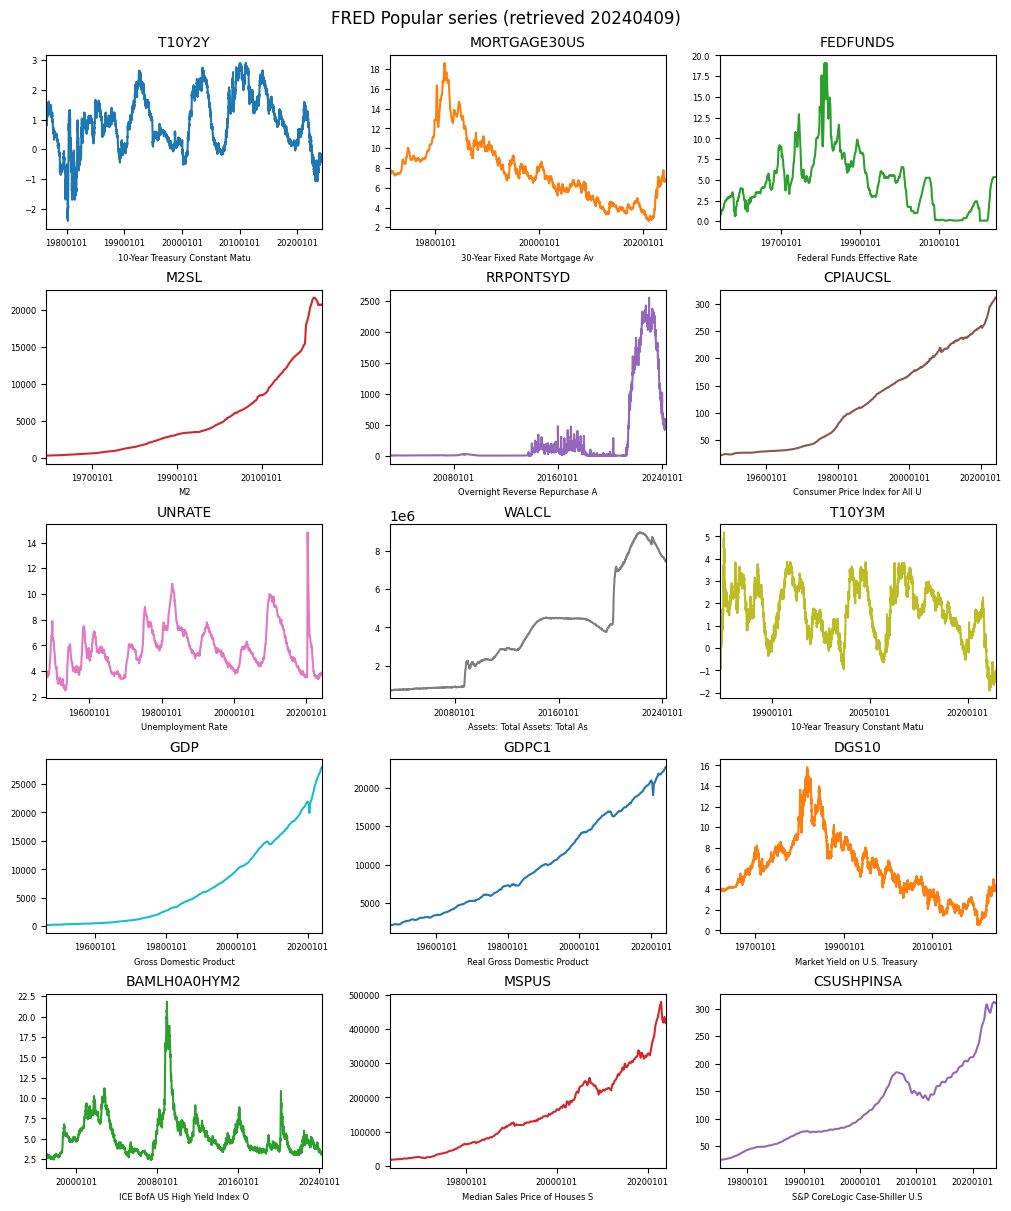

In [4]:
# plot popular series
fig, axes = plt.subplots(ncols=3, nrows=5, figsize=(10, 12), layout='constrained')
for cn, (ax, title) in enumerate(zip(np.ravel(axes), titles[:15])):
    series = alf(title)
    plot_date(series, ax=ax, title=title, xlabel=alf.header(title)[:30],
              fontsize=6, ls='-', cn=cn, nbins=4)
plt.suptitle(f"FRED Popular series (retrieved {today})")

In [5]:
# Traversing categories tree
node = 0
while True:
    node = alf.get_category(node)
    print(f"[{node['id']}]", node['name'],
          f"(#children = {len(node['children'])})",
          f"(#series = {len(node['series'])})")
    if not (node['children']):
        break
    node = random.choice(node['children'])['id']

[0] Categories (#children = 8) (#series = 0)
[33060] Academic Data (#children = 14) (#series = 1)
[33402] Penn World Table 9.0 (#children = 6) (#series = 0)
[33404] Current Price GDP, Capital and Total Factor Productivity (#children = 0) (#series = 616)


### Revisions and Vintage Dates

On the first Friday of every month,the Bureau of Labor Statistics (BLS) publishes its Employment Situation Summary, which contains the highly-anticipated Total Nonfarm Payroll Employment based on firms’ reports of the number of people employed. However, it is a very rough estimate and is revised the following month, and then again the month after as more information arrives at the BLS. These revisions can be large and may materially change the picture of the economy. ALFRED, the archival FRED tool, captures these data revisions.

Referenes:
- Katrina Stierholz, 2018, Economic Data Revisions: What They Are and Where to Find Them
https://journals.ala.org/index.php/dttp/article/view/6383/8404

In [6]:
series_id, freq = 'PAYEMS', 'M'
start, end = 20230101, 20231231,
data = {}
print(f"{alf.header(series_id)} (retrieved {today}):")
latest = alf(series_id, start=start, end=end, freq=freq, realtime=True)
latest

All Employees, Total Nonfarm (retrieved 20240409):


,PAYEMS,realtime_start,realtime_end
date,,,
20230131,154773,20240202,99991231
20230228,155060,20240202,99991231
20230331,155206,20240202,99991231
20230430,155484,20240202,99991231
20230531,155787,20240202,99991231
20230630,156027,20240202,99991231
20230731,156211,20240202,99991231
20230831,156421,20240202,99991231
20230930,156667,20240202,99991231


In [7]:
print("First Release:")
data[0] = alf(series_id, release=1, start=start, end=end, freq=freq, realtime=True)
data[0]

First Release:


,PAYEMS,realtime_start,realtime_end
date,,,
20230131,155073,20230203,20230309
20230228,155350,20230310,20230406
20230331,155569,20230407,20230504
20230430,155673,20230505,20230601
20230531,156105,20230602,20230706
20230630,156204,20230707,20230803
20230731,156342,20230804,20230831
20230831,156419,20230901,20231005
20230930,156874,20231006,20231102


In [8]:
print("Second Release:")
data[1] = alf(series_id, release=2, start=start, end=end, freq=freq, realtime=True)
data[1]

Second Release:


,PAYEMS,realtime_start,realtime_end
date,,,
20230131,155039,20230310,20230406
20230228,155333,20230407,20230504
20230331,155420,20230505,20230601
20230430,155766,20230602,20230706
20230531,155995,20230707,20230803
20230630,156155,20230804,20230831
20230731,156232,20230901,20231005
20230831,156538,20231006,20231102
20230930,156773,20231103,20231207


In [9]:
print("Third Release:")
data[2] = alf(series_id, release=3, start=start, end=end, freq=freq, realtime=True)
data[2]

Third Release:


,PAYEMS,realtime_start,realtime_end
date,,,
20230131,155007,20230407,20240201
20230228,155255,20230505,20240201
20230331,155472,20230602,20240201
20230430,155689,20230707,20240201
20230531,155970,20230804,20240201
20230630,156075,20230901,20240201
20230731,156311,20231006,20240201
20230831,156476,20231103,20240201
20230930,156738,20231208,20240201


In [10]:
print("Fourth Release:")
data[3] = alf(series_id, release=4, start=start, end=end, freq=freq, realtime=True)
data[3]

Fourth Release:


,PAYEMS,realtime_start,realtime_end
date,,,
20230131,154773,20240202,99991231
20230228,155060,20240202,99991231
20230331,155206,20240202,99991231
20230430,155484,20240202,99991231
20230531,155787,20240202,99991231
20230630,156027,20240202,99991231
20230731,156211,20240202,99991231
20230831,156421,20240202,99991231
20230930,156667,20240202,99991231


In [11]:
df = pd.concat([(data[i][series_id] - data[i-1][series_id]).rename(f"Revision {i}")
                for i in range(1, len(data))], axis=1)
labels = pd.concat([data[i]['realtime_start'].rename(f"Revision {i}")
                    for i in range(1, len(data))], axis=1).fillna(0).astype(int)
DataFrame(df.sum(axis=0).rename("Total revisions ('000)"))

,Total revisions ('000)
Revision 1,-349.0
Revision 2,-348.0
Revision 3,-1368.0


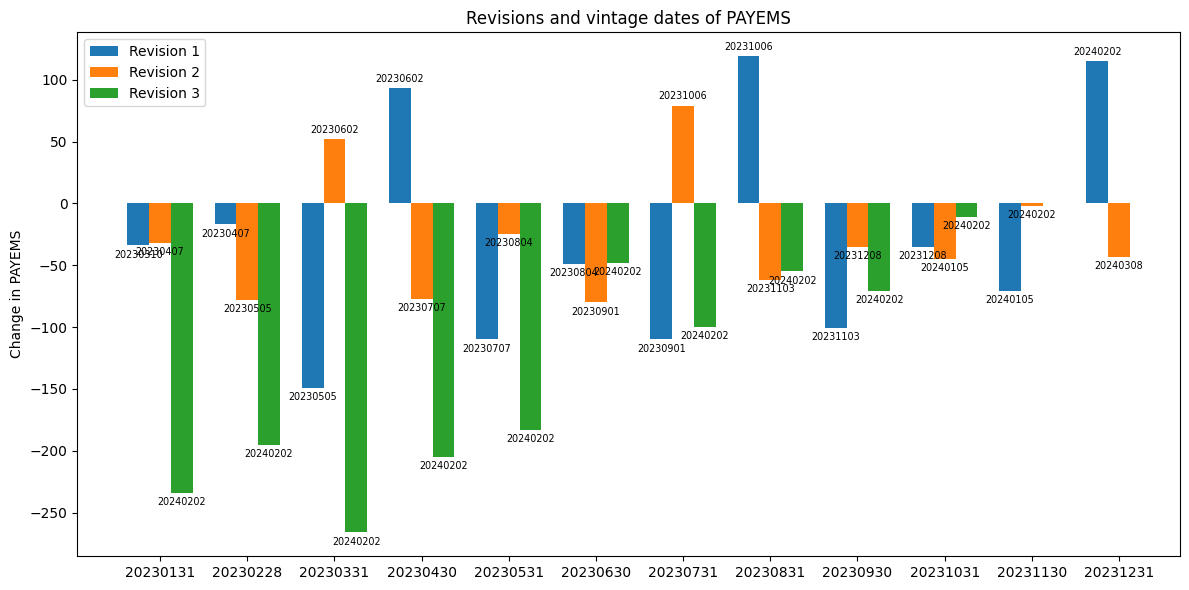

In [12]:
#df = pd.concat([data[i][series_id].rename(f"Revision {i}")
#                for i in range(1, len(data))], axis=1)
#labels = pd.concat([data[i]['realtime_start'].rename(f"Revision {i}")
#                    for i in range(1, len(data))], axis=1).fillna(0).astype(int)
fig, ax = plt.subplots(figsize=(12, 6))
plot_groupbar(df, labels=labels, ax=ax)
plt.legend()
plt.ylabel(f'Change in {series_id}')
plt.title(f'Revisions and vintage dates of {series_id}')
plt.tight_layout()
plt.show()

## FRED-MD and FRED-QD

FRED-MD and FRED-QD are datasets of monthly and quarterly observations mimic the coverage of macroeconomic datasets already used in the literature. They are are updated in real-time through the FRED database, and relieve the researcher of the task of incorporating data changes and revisions (a task accomplished by the data desk at the Federal Reserve Bank of St. Louis). They are publicly accessible, hence facilitating the replication of empirical work.

References
- https://research.stlouisfed.org/econ/mccracken/fred-databases/

### Release dates

In [13]:
md_df, md_transform = fred_md()
end = md_df.index[-1]
out = {}
for i, title in enumerate(md_df.columns):
    out[title] = alf(series_id=title,
                     release=1,
                     start=end-4, # within 4 days of monthend
                     end=end,
                     realtime=True)
    if title.startswith('S&P'):  # stock market data available same day close
        out[title] = Series({end: end}, name='realtime_start').to_frame()
    elif title in alf.splice_:
        if isinstance(Alfred.splice_[title], str):
            out[title] = alf(series_id=Alfred.splice_[title],
                             release=1,
                             start=end-4,  # within 4 days of monthend
                             end=end,
                             realtime=True)
        else:  # if FRED-MD series was spliced
            out[title] = pd.concat([alf(series_id=sub,
                                        reglease=1,
                                        start=end-4,  # within 4 days of monthend
                                        end=end,
                                        realtime=True)
                                    for sub in Alfred.splice_[title][1:]])

FRED-MD vintage: monthly/current.csv


In [14]:
# date convention of Consumer Sentiment
df = alf('UMCSENT', release=1, realtime=True)
out['UMCSENT'] = df[df['realtime_start'] > end - 4].iloc[:1]

In [15]:
# weekly averages of Claims
df = alf('ICNSA', release=1, realtime=True)
out['CLAIMS'] = df[df['realtime_start'] > end - 4].iloc[:1]

In [16]:
# Plot release dates of series in FRED-MD
release = Series({k: str(min(v['realtime_start'])) if v is not None and len(v)
                  else None  for k,v in out.items()}).sort_values()

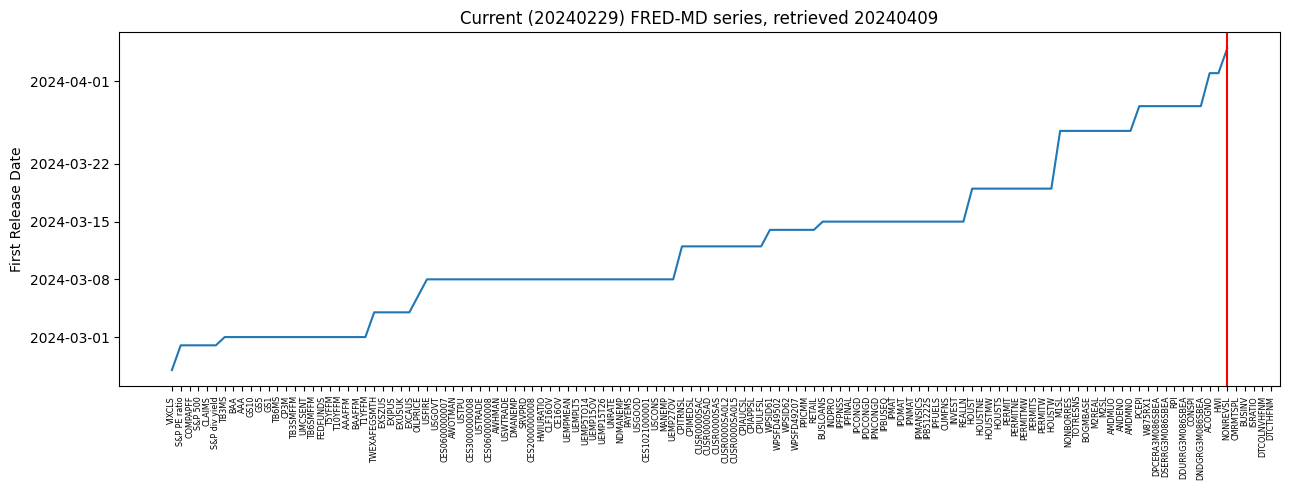

In [17]:
fig, ax = plt.subplots(clear=True, num=1, figsize=(13, 5))
ax.plot(pd.to_datetime(release, errors='coerce'))
ax.axvline(release[~release.isnull()].index[-1], c='r')
ax.set_title(f"Current ({end}) FRED-MD series, retrieved {today}")
ax.set_ylabel('First Release Date')
ax.set_xticks(np.arange(len(release)))
ax.set_xticklabels(release.index, rotation=90, fontsize='xx-small')
plt.tight_layout()

In [18]:
# Check if recently released data available to update latest FRED-MD                         
md_missing = md_df.iloc[-1]
md_missing = md_missing[md_missing.isnull()]
print("Recent values available to update missing in current FRED-MD")
for series_id in md_missing.index:
    print(alf.splice(series_id).iloc[-3:])


Recent values available to update missing in current FRED-MD
date
20231130    1514120.0
20231231    1523993.0
20240131    1502408.0
Name: CMRMTSPL, dtype: float64
date
20231231    8889
20240131    8748
20240229    8756
Name: HWI, dtype: int64
date
20240131    1.428478
20240229    1.355838
20240331         NaN
Name: HWIURATIO, dtype: float64
date
20231231    245258.0
20240131    243376.0
20240229    248962.0
Name: ACOGNO, dtype: float64
date
20231130    2546845.0
20231231    2554770.0
20240131    2555003.0
Name: BUSINV, dtype: float64
date
20231130    1.37
20231231    1.38
20240131    1.39
Name: ISRATIO, dtype: float64
date
20231231    3700.45907
20240131    3709.54790
20240229    3712.40931
Name: NONREVSL, dtype: float64
date
20231231    0.158160
20240131    0.156999
20240229    0.156679
Name: CONSPI, dtype: float64
date
20240229    1.41
20240331    1.37
20240430    1.36
Name: S&P div yield, dtype: float64
date
20240229    33.34
20240331    34.37
20240430    34.54
Name: S&P PE ratio, d

In [19]:
# Show release date, if any, available to update latest FRED-MD
Series(release.values, index=[(s, alf.header(s)) for s in release.index])\
    .tail(len(md_missing))

(RPI, Real Personal Income)                                                                        20240329
(DDURRG3M086SBEA, Personal consumption expenditures: Durable goods (chain-type price index))       20240329
(CONSPI, Nonrevolving consumer credit to Personal Income)                                          20240329
(DNDGRG3M086SBEA, Personal consumption expenditures: Nondurable goods (chain-type price index))    20240329
(ACOGNO, Manufacturers' New Orders: Consumer Goods)                                                20240402
(HWI, Help Wanted Index for United States)                                                         20240402
(NONREVSL, Nonrevolving Consumer Credit Owned and Securitized)                                     20240405
(CMRMTSPL, Real Manufacturing and Trade Industries Sales)                                              None
(BUSINV, Total Business Inventories)                                                                   None
(ISRATIO, Total Business: In